## Project : Visualization for Company Stakeholders
### Problem Statement
You have been hired by the stakeholders of Dream Housing Finance company to help them get visual insights on the company's operations. Using the data visualization techniques you learned, you have to help visualise the data and see if you can help the stakeholders arrive at some inference based on the visual plots.

#### About the Dataset
The snapshot of the data, you will be working on:

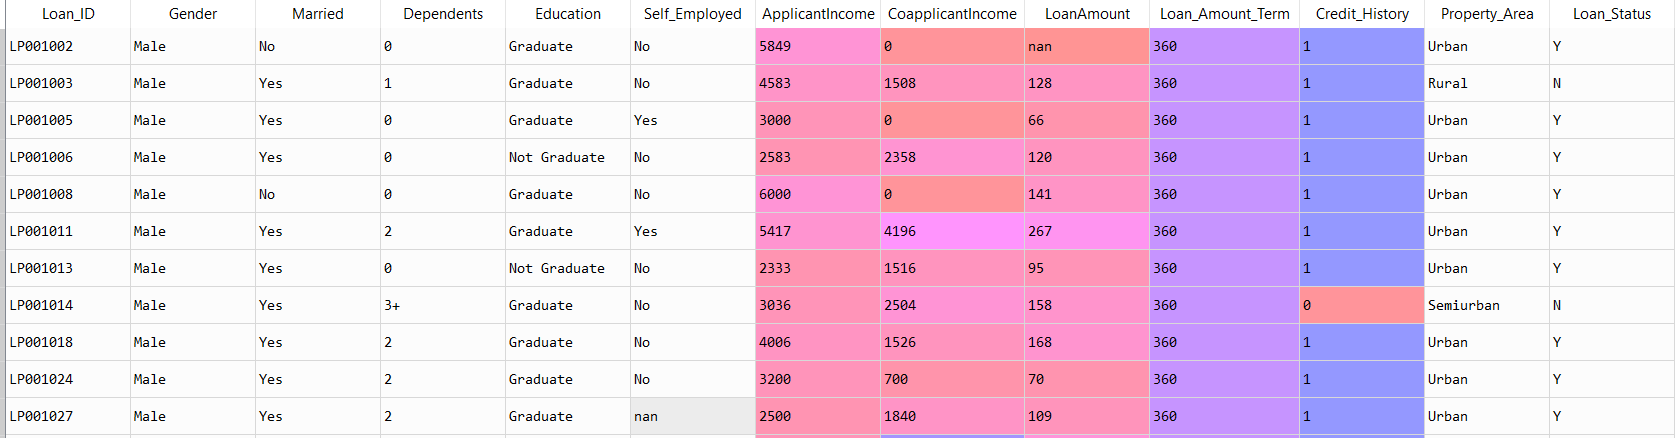

The dataset has details of 614 customers with the following 13 features

| Feature | Description |
|:-------:|:-----------:|
Loan_ID	| Unique Loan ID
Gender | Male/Female
Married | Applicant Married (Y/N)
Dependents | Number of dependents
Education | Graduate/Under Graduate
Self_Employed | Self employed (Y/N)
ApplicantIncome | Income of the applicant
CoapplicantIncome | Income of the co applicant
LoanAmount | Loan amount in thousands
LoanAmountTerm | Term of loan in months
Credit_History | credit hostory meets guidelines}
Property_Area | Urban/Semi-Urban/Rural
Loan_Status | Loan approved (Y/N)

#### Why solve this project?
After completing this project, you will have a better understanding of data visualization techniques. In this project, you will be applying the following concepts:
* Bar plotting
* Scatter plotting
* Kernel Density plotting
* Subplot operations
* Axes modifications

### Instructions :
### Step 1

Let's start with the simple task of visualizing the company's record with respect to loan approvals.
* Save the value counts of `Loan_Status` in a variable called `loan_status` using `value_counts()`
* Plot a bar graph of `loan_status`

#### Things to ponder upon:
```
- Company has more 'loan approvals' or 'loan disapprovals'?
- Can one of the company's health factors be its loan status distribution? 
```
---
* `data.iloc[25,1]` shoule be `Male`
* `data.iloc[53,9]` should be 360
* `loan_status[0]` should be 415
* `loan_status[1]` should be 185

---

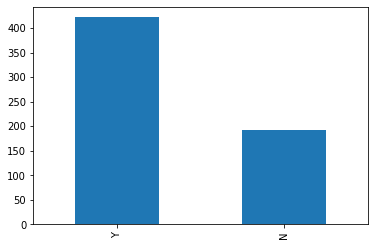

In [1]:
#Importing header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Reading the file
data = pd.read_csv(PATH)

#Creating a new variable to store the value counts
loan_status = data['Loan_Status'].value_counts()

#Plotting bar plot
loan_status.plot( kind='bar' )

### Step 2

#### Everyone needs money
The company provides financial assistance across the different regions of the country. One interesting statistic that stakeholders want to see is the loan approval distribution across the regions.

#### Instructions :
* Group the `data` dataframe by `Property_Area` and `Loan_Status` and store it in a variable called `property_and_loan`
* Use the `.size()` method on `property_and_loan` and then use `.unstack()` and save it back to `property_and_loan`
* Plot an unstacked bar plot of `property_and_loan` (It is similar to creating a stacked bar plot except change the parameter `stacked` to False)
* Name the x-axis as `Property Area`
* Name the y-axis as `Loan Status`
* Rotate the labels of x-axis by 45 degrees

#### Things to ponder upon
```
- Which is the region with the highest no. of loan approvals? lowest no. of loan approvals?
- Which is the region with the maximum difference between loan approvals and loan rejections?
```
---
* `property_and_loan['N'][1]` should be 51
* `property_and_loan['Y'][0]` should be 109

---

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

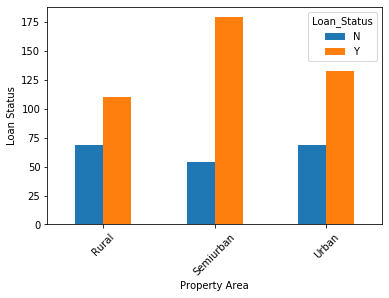

In [2]:
# Step 2: Plotting an unstacked bar plot
property_and_loan = data.groupby(['Property_Area', 'Loan_Status'])
property_and_loan = property_and_loan.size().unstack()
property_and_loan.plot(kind='bar', stacked=False )

#Changing the x-axis label
plt.xlabel('Property Area')

#Changing the y-axis label
plt.ylabel('Loan Status')

#Rotating the ticks of X-axis
plt.xticks(rotation = 45)

### Step 3
#### Expensive Education
Higher education has always been an expensive endeavour for people but it results in better career opportunities and stability in life. But does higher education result in a better guarantee in issuing loans?

#### Instructions :
* Group the `data` dataframe by `Education` and `Loan_Status` and store it in a variable called `education_and_loan`
* Use the `.size()` method on `education_and_loan` and then use `.unstack()` and save it back to `education_and_loan`
* Plot an stacked bar plot of `education_and_loan`
* Name the x-axis as `Education Status`
* Name the y-axis as `Loan Status`
* Rotate the labels of x-axis by 45 degrees

#### Things to ponder upon
```
- Overall which group has asked for higher loan services irrespective of the approval? Graduate or Non-Graduate?
- Which group has had better approval to non-approval ratio? Graduate or Non-Graduate?
  Do the above conclusions make sense? Why?
```
---
* `education_and_loan['N'][1]` should be 52
* `education_and_loan['Y'][0]` should be 333

---

(array([0, 1]), <a list of 2 Text xticklabel objects>)

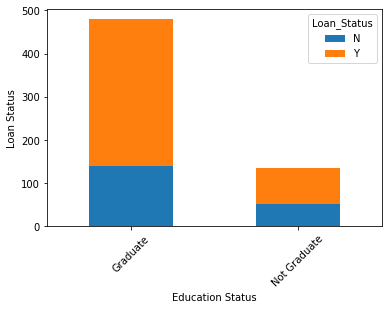

In [3]:
# Step 3: Plotting a stacked bar plot
education_and_loan = data.groupby(['Education', 'Loan_Status']).size().unstack()
education_and_loan.plot(kind='bar', stacked=True )

#Changing the x-axis label
plt.xlabel('Education Status')

#Changing the y-axis label
plt.ylabel('Loan Status')

#Rotating the ticks of X-axis
plt.xticks(rotation = 45)

### Step 4

#### Smarter and Richer?
After seeing the loan status distribution, let's check whether being graduate or not also leads to different loan amount distribution by plotting an overlapping density plot of two values

#### Instructions :
* Create a dataframe called `graduate` which is a subset of `data` dataframe with the condition `data['Education'] == 'Graduate'`
* Create a dataframe called `not_graduate` which is a subset of `data` dataframe with the condition `data['Education'] == 'Not Graduate'`
* Plot a density plot `LoanAmount` of `graduate` dataframe using `Series.plot()` and pass the parameter `kind='density'` and `label='Graduate'`
* Do the same for `LoanAmount` of `not_graduate` dataframe but with `label='Not Graduate'`

#### Things to ponder upon
```
- Do Graduate people get approved a higher amount than their Non Graduate counterparts?
- What's the average amount of loan approved for Graduate? for Non-Graduate? Is there a huge difference between the two? 
```
---
* The condition`np.all(graduate['Education']=='Graduate'` should be satisfied that is all the values in the column `Eductaion` of the DataFrame should be `Graduate`

* The condition`np.all(not_graduate['Education']=='Graduate'` should be satisfied that is all the values in the column `Eductaion` of the DataFrame should be `Not Graduate`

---

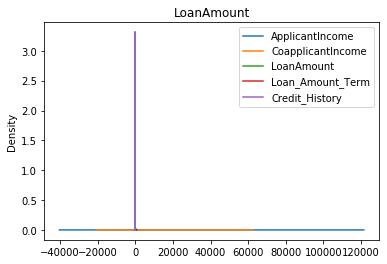

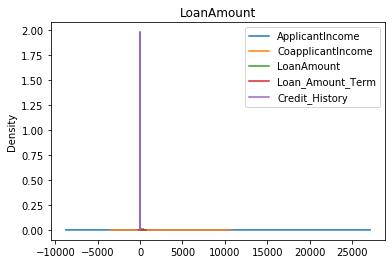

In [4]:
# Step 4: Subsetting the dataframe based on 'Education' column
#Subsetting the dataframe based on 'Education' column
graduate = data[ data['Education'] == 'Graduate' ]
not_graduate = data[ data['Education'] == 'Not Graduate' ]

#Plotting density plot for 'Graduate'
graduate.plot( kind='density', label='Graduate', title='LoanAmount' )

#Plotting density plot for 'Not Graduate'
not_graduate.plot( kind='density', label='Not Graduate', title='LoanAmount' )

#For automatic legend display

### Step 5

#### Income vs Loan
For any financial institution to be successful in its loan lending system, there has to be a correlation between the borrower's income and loan amount he is lent. Let's see how our company fares in that respect:

#### Instructions :
* Create three subplots with `(nrows = 3 , ncols = 1)` and store it in variable's `fig ,(ax_1,ax_2,ax_3)`
* Since both are continuous variables, plot scatter plot between `ApplicantIncome` and `LoanAmount` using `ax_1`. Set axis title as `Applicant Income`
* Plot scatter plot between `CoapplicantIncome` and `LoanAmount` using `ax_2`. Set axis title as `Coapplicant Income`
* Create a new column in the dataframe called `TotalIncome` which is a sum of the values of columns `ApplicantIncome` and `CoapplicantIncome`
* Plot scatter plot between `TotalIncome` and `LoanAmount` using `ax_3`. Set axis title as `Total Income`

#### Things to ponder upon
- Is there a correlation between 'ApplicantIncome' and 'LoanAmount'? (One way to know that is looking at the line formed when you connect the scatter plot dots?)
- Is the 'TotalIncome' better related to the 'LoanAmount' than 'ApplicantIncome'?
---
#### Test Case:

* The condition `data['TotalIncome'][1] == 6091` should be satisfied.

---

Text(0.5, 1.0, 'Total Income')

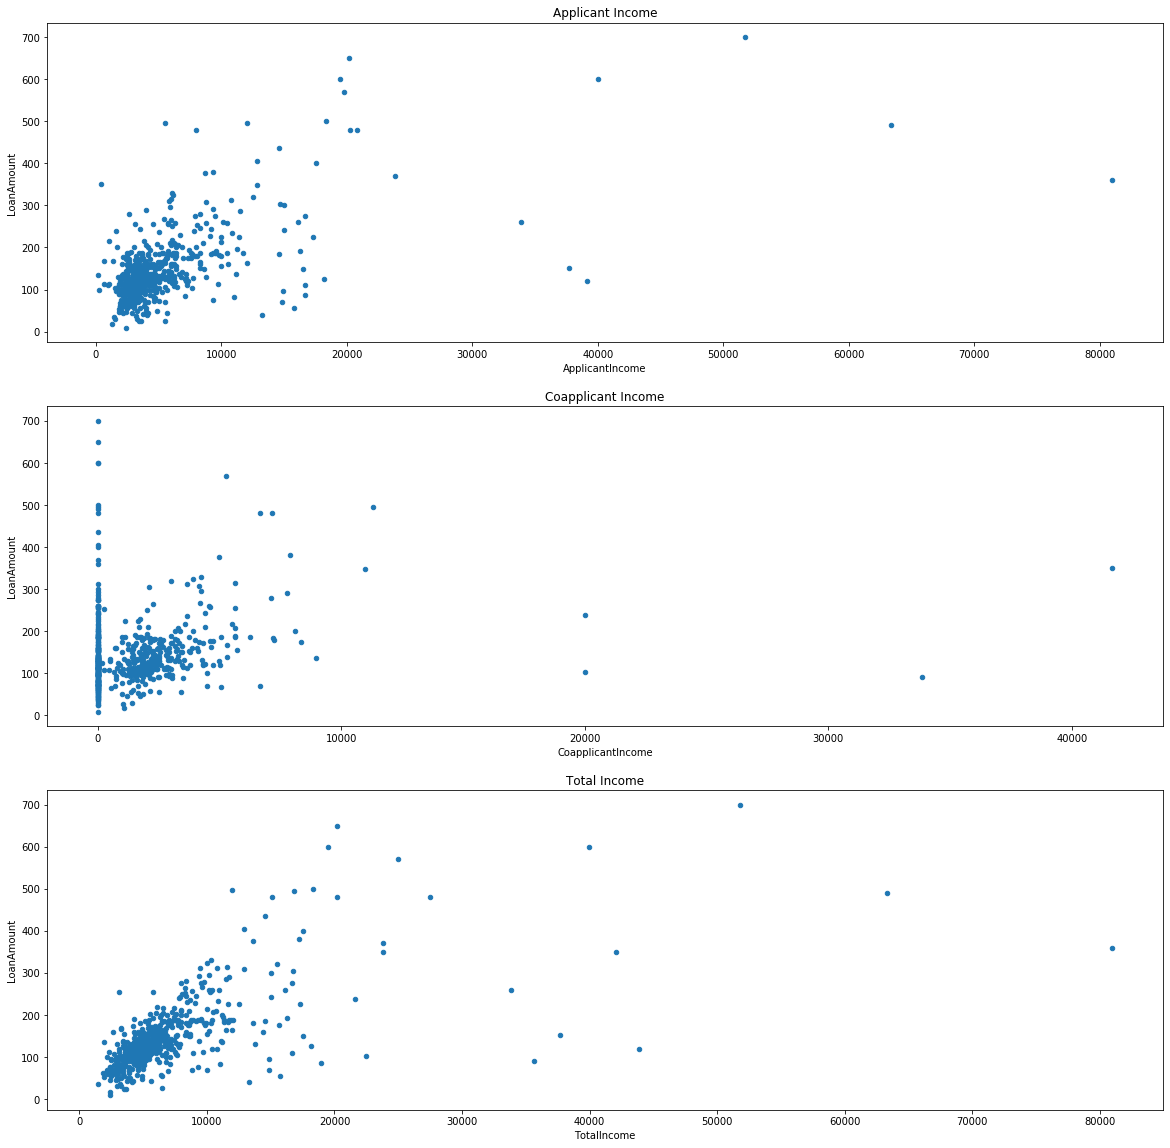

In [5]:
# Step 5: Setting up the subplots
fig, (ax_1, ax_2, ax_3) = plt.subplots(nrows = 3 , ncols = 1, figsize=(20,20))

#Plotting scatter plot
data.plot.scatter( 'ApplicantIncome', 'LoanAmount', ax=ax_1 )

#Setting the subplot axis title
ax_1.set_title('Applicant Income')

#Plotting scatter plot
data.plot.scatter( 'CoapplicantIncome', 'LoanAmount', ax=ax_2 )

#Setting the subplot axis title
ax_2.set_title('Coapplicant Income')

#Creating a new column 'TotalIncome'
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

#Plotting scatter plot
data.plot.scatter( 'TotalIncome', 'LoanAmount', ax=ax_3 )

#Setting the subplot axis title
ax_3.set_title('Total Income')